# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.spatial import distance_matrix

%matplotlib inline

# How does k- Means clustering algorithm work:

        k_means involves partitioning a Dataset of N objects into a set of K clusters , such that the sum of Squared 
        distances is minimized.
        
        Steps involved:
                        1. Randomly select K objects from Dataset 'D' as the initial cluster centeroids
                        Repeat until no change:
                            2. reassign each object in Dataset 'D' to the cluster such that the sum of squared
                               distances between each object and the its cluster centeroid is minimum
                               (reassign each object to a cluster to which it is most similar)
                            3. update cluster centeroids:
                                        calculate mean of all objects in each cluster,
                                        update cluster centeroid as the mean value

# The k means function 

    'X' is the dataset in form of an numpy array
    'k' is the number of clusters we want to divide the dataset 'X' 

In [8]:
def k_means(X, K):
    nrow = X.shape[0] #no of rows
    ncol = X.shape[1] #no of coloumns
    
    #pick k random points as initial centeroids
    initial_centeroids = np.random.choice(nrow, K, replace=False) # chose K random number from the given range (0 to nrow)

    #select the data point that will serve as initial centeroids
    centeroids = X[initial_centeroids] #ex: initial = [10,45,2]; centeroids = [ x[10] , x[45] , x[2] ]
    
    #creating a varialble that holds value of centeroids from previous step
    centeroids_old = np.zeros((K, ncol)) #2D array initialized with 0 of shape(K x ncols)
    
    #variable for cluster assignent
    cluster_assignment = np.zeros(nrow) # creates 1D array with no of elements = nrows initially all assigned with 0
    while (centeroids_old != centeroids).any(): #Repeat until centeroids dont change
        centeroids_old = centeroids.copy()#save new centeroids value before updating,in order to check later if centeroids changes
        
        #compute the distances between data points and centeroids
        dist_matrix = distance_matrix(X, centeroids) #returns a matrix containing distance between every object in X and every object in centeroids
        
        for i in np.arange(nrow):
            # for each row in X (each data point) find closest centeroid / centeroid with minimum distance between them
            d = dist_matrix[i]
            closest_centeroid = (np.where(d == np.min(d)))[0][0]
            
            #associate data points with closest centeroid
            cluster_assignment[i] = closest_centeroid 
            
        #recompute centeroids
        for k in np.arange(K):
            Xk = X[cluster_assignment == k] #Xk is 2d Array: contains K rows; row 0 : array of all datapoints assigned to cluster 0
                                            #row k : contains araay of all datapoints assigned to cluster k
            centeroids[k] = np.apply_along_axis(np.mean, axis=0, arr= Xk) #calculate mean row wise (mean of each cluster)
            
    return (centeroids, cluster_assignment)
    
    

# Using Synthetic Dataset

    using numpy's arrange method & numpy's random normal generator to create 2 features x , y
    random normal : gaussian distribution with mean 0 and unit std deviation.
    x : simply a sequence generated using arrange(between a given range and increment step)
    y : k + random_normsl(mean= 0 nd std_div 1) * 2
        
    for class labels we simply generate 'n' dimensional vector of ones , then a multiply them with a scaler value
    where n is the size of x and y(number of rows/examples)
    
    note: remember to set random seed , otherwise each time we run the code y(the random num generator) will give
          different values hence dataset will be different each time we run the code.
          so to allow reproduceability of dataset and results random seed must be fixed 


In [7]:
np.random.seed(42)

x_cluster_1 = np.arange(1, 6, 0.1)
y_cluster_1 = 1 + (np.random.normal(0, 1, len(x_cluster_1))) * 2

x_cluster_2 = np.arange(9, 14, 0.1)
y_cluster_2 = 1 + (np.random.normal(0, 1, len(x_cluster_2))) * 2

x_cluster_3 = np.arange(3, 10, 0.1)
y_cluster_3 = 15 + (np.random.normal(0, 1, len(x_cluster_3))) * 2

x = np.concatenate([x_cluster_1, x_cluster_2, x_cluster_3])
y = np.concatenate([y_cluster_1, y_cluster_2, y_cluster_3])

data = np.column_stack((x,y))
print(data.shape)
data


(170, 2)


array([[ 1.00000000e+00,  1.99342831e+00],
       [ 1.10000000e+00,  7.23471398e-01],
       [ 1.20000000e+00,  2.29537708e+00],
       [ 1.30000000e+00,  4.04605971e+00],
       [ 1.40000000e+00,  5.31693251e-01],
       [ 1.50000000e+00,  5.31726086e-01],
       [ 1.60000000e+00,  4.15842563e+00],
       [ 1.70000000e+00,  2.53486946e+00],
       [ 1.80000000e+00,  6.10512281e-02],
       [ 1.90000000e+00,  2.08512009e+00],
       [ 2.00000000e+00,  7.31646144e-02],
       [ 2.10000000e+00,  6.85404929e-02],
       [ 2.20000000e+00,  1.48392454e+00],
       [ 2.30000000e+00, -2.82656049e+00],
       [ 2.40000000e+00, -2.44983567e+00],
       [ 2.50000000e+00, -1.24575058e-01],
       [ 2.60000000e+00, -1.02566224e+00],
       [ 2.70000000e+00,  1.62849467e+00],
       [ 2.80000000e+00, -8.16048151e-01],
       [ 2.90000000e+00, -1.82460740e+00],
       [ 3.00000000e+00,  3.93129754e+00],
       [ 3.10000000e+00,  5.48447399e-01],
       [ 3.20000000e+00,  1.13505641e+00],
       [ 3.

# visualize the data

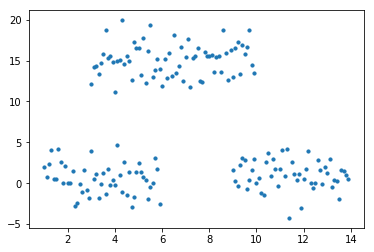

In [4]:
plt.scatter(data[:, 0], data[:, 1], s = 10)

# Call k means function

In [5]:
K= 3
k_means_result = k_means(data, K)

centeroids = k_means_result[0]
cluster_assignment = (k_means_result[1]).tolist()

colors = ['r', 'g','b']
f = lambda x: colors[int(x)]
cluster_assignment = list(map(f, cluster_assignment))

    f is now a function used to change cluster number to color r g & b
    if 0 : r ; 1 : b ; 2 : g

# Plot the clusters

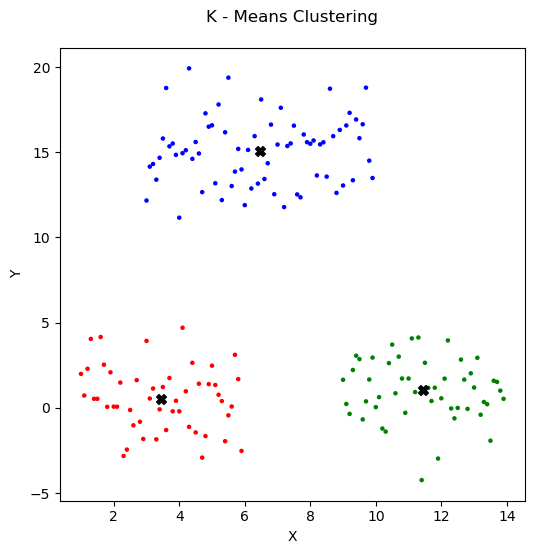

In [6]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi = my_dpi)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('K - Means Clustering\n')

plt.scatter(data[:, 0], data[:, 1], color = cluster_assignment, s = 5)
plt.scatter(centeroids[:,0],centeroids[:,1], color = 'black', marker='X',s=50)

# Using A Public Dataset 
        
        Dataset used : Iris
        Description :
                     150 rows / examples 
                     5 coloumn (4 features , 1 class label)
                     feature: Sepal-Length	Sepal-Width	Petal-Length	Petal-Width
                     3 classes : Iris-setosa , iris-versicolor , iris-virginica

In [7]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
species = {'Iris-setosa': 0,'Iris-versicolor': 1,'Iris-virginica' : 2}
iris['Species_code'] = [species[item] for item in iris.Species]
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_code
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [9]:
groups=iris.groupby('Species')
groups.count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_code
Species,,,,,,
Iris-setosa,50,50,50,50,50,50
Iris-versicolor,50,50,50,50,50,50
Iris-virginica,50,50,50,50,50,50


In [10]:
features = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
features.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
dataset= features.values
dataset

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Plot the dataset based on Sepal length and Sepal width

Text(0,0.5,'Sepal Width')

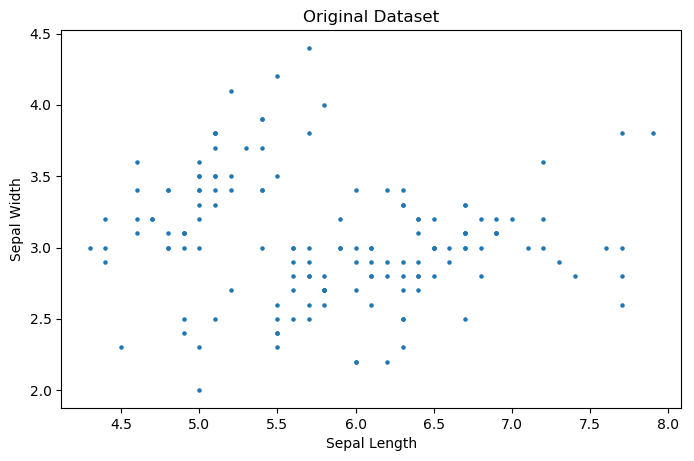

In [12]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 500/my_dpi), dpi = my_dpi)

plt.scatter(dataset[:,0],dataset[:,1], s = 5)
plt.title("Original Dataset")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Plot the dataset based on Petal length and Petal width

Text(0,0.5,'Petal Width')

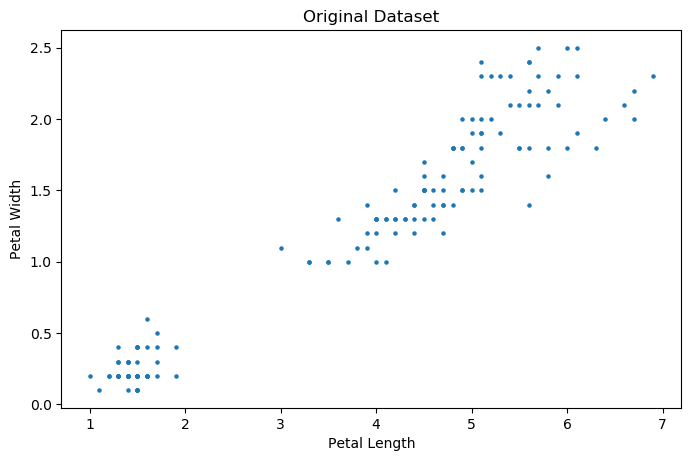

In [13]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 500/my_dpi), dpi = my_dpi)

plt.scatter(dataset[:,2],dataset[:,3], s = 5)
plt.title("Original Dataset")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Use K_means function to Cluster the data points in the dataset

In [14]:
k_means_result = k_means(dataset, 3)

centeroids = k_means_result[0]
cluster_assignment = (k_means_result[1]).tolist()

In [15]:
colors = ['r', 'g','b']
g = lambda x: colors[int(x)]
cluster_assignment = list(map(g, cluster_assignment))

# show clusters based on Sepal lenght and Sepal width

Text(0,0.5,'Sepal Width')

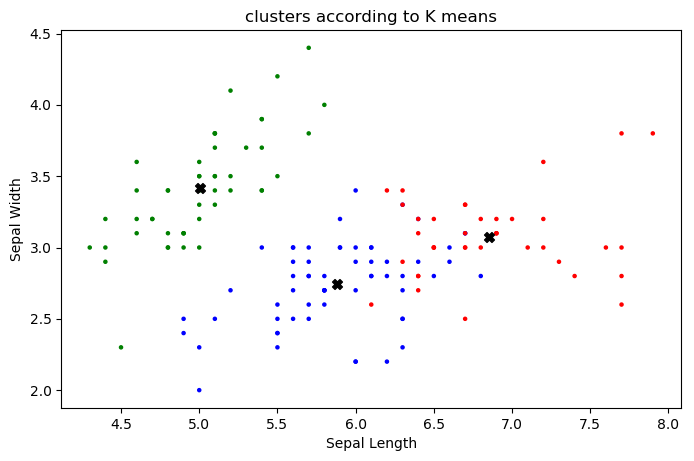

In [16]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 500/my_dpi), dpi = my_dpi)

plt.scatter(dataset[:,0],dataset[:,1], s = 5,color = cluster_assignment)
plt.scatter(centeroids[:,0],centeroids[:,1], color = 'black', marker='X',s=50)
plt.title("clusters according to K means")
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# show clusters based on Petal lenght and Petal width

Text(0,0.5,'Petal Width')

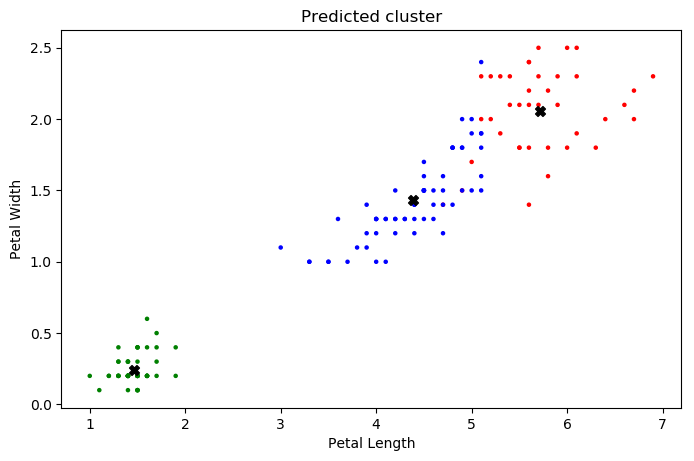

In [18]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(800/my_dpi, 500/my_dpi), dpi = my_dpi)

plt.scatter(dataset[:,2],dataset[:,3], s = 5, color= cluster_assignment)
plt.scatter(centeroids[:,2],centeroids[:,3], color = 'black', marker='X',s=50)
plt.title("Predicted cluster")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')